In [19]:
import tensorflow as tf
tf.__version__

'2.1.0'

In [20]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [21]:
import torch
torch.cuda.is_available()

True

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import torchvision
from torchvision import datasets, transforms

In [23]:
import os

In [31]:
# Joining Directory Paths

for root,directory_names,file_names in os.walk('/home/wei/workspace/msda/dl/archive/orig/archive', topdown=True):
    for each_file_name in file_names:
        os.path.join(root, each_file_name)

In [25]:
input = '/home/wei/workspace/msda/dl/archive/orig/archive'

In [26]:
# Data Preprocessing

image_generator = keras.preprocessing.image.ImageDataGenerator(rescale=1/255,
                                     validation_split=0.2,
                                     horizontal_flip=True, #Data Augmentation
                                     vertical_flip=True,   #Data Augmentation
                                     rotation_range=15,    #Data Augmentation
                                     fill_mode='nearest')

training_dataset = image_generator.flow_from_directory(input,
                                                       batch_size=32,
                                                       shuffle=True,
                                                       target_size=(128,128),
                                                       subset="training",
                                                       class_mode="binary")

validation_dataset = image_generator.flow_from_directory(input,
                                                       batch_size=32,
                                                       shuffle=True,
                                                       target_size=(128,128),
                                                       subset="validation",
                                                       class_mode="binary")

# Original Dataset divided into Training(80%) and Validation(20%) datasets

Found 32000 images belonging to 2 classes.
Found 8000 images belonging to 2 classes.


In [27]:
from tensorflow.keras import layers,models

crack_detection_model = models.Sequential()

# Input Layer - Convolutional
crack_detection_model.add(layers.Conv2D(256, # 256 - no of filters (also, no of output images)
                                 (1,1),
                                 strides=(1,1),
                                 padding="valid",
                                 use_bias=True,
                                 input_shape=(128,128,3),
                                 activation="relu"
                                 )
                          )

# Five Hidden layers - Maxpool, Convolutional, Maxpool, Convolutional, Maxpool
crack_detection_model.add(layers.MaxPooling2D(pool_size=(2,2),
                                       padding="valid",
                                       strides=(2,2), # In MaxPooling2D, strides anyway default to pool_size
                                       )
                         )

crack_detection_model.add(layers.Conv2D(256, #no of filters (also, no of output images)
                                 (1,1),
                                 strides=(1,1),
                                 padding="valid",
                                 use_bias=True,
                                 activation="relu"
                                 )
                          )

crack_detection_model.add(layers.MaxPooling2D(pool_size=(2,2),
                                       padding="valid",
                                       strides=(2,2),
                                       )
                         )

crack_detection_model.add(layers.Conv2D(256,
                                 (1,1),
                                 strides=(1,1),
                                 padding="valid",
                                 use_bias=True,
                                 activation="relu"
                                 )
                          )

crack_detection_model.add(layers.MaxPooling2D(pool_size=(2,2),
                                       padding="valid",
                                       strides=(1,1)
                                       )
                         )

 #Flattening the pixel matrix to feed the dense layer
crack_detection_model.add(layers.Flatten())

# Three Hidden Layers - Dense NN
crack_detection_model.add(layers.Dense(128,
                                       activation='relu',
                                       kernel_regularizer='l2'),
                          )

crack_detection_model.add(layers.Dense(64,
                                       activation='relu',
                                       kernel_regularizer='l2'),
                          )

crack_detection_model.add(layers.Dense(32,
                                       activation='relu',
                                       kernel_regularizer='l2'),
                          )

crack_detection_model.add(layers.Dense(8,
                                       activation='relu',
                                       kernel_regularizer='l2'),
                          )

# Output Layer - Single node with Sigmoid/SoftMax activation function for classification
crack_detection_model.add(layers.Dense(1,
                                       activation='sigmoid',
                                       kernel_regularizer='l2'),
                          )



In [28]:
crack_detection_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 128, 128, 256)     1024      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 64, 64, 256)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 64, 256)       65792     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 32, 256)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 256)       65792     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 31, 31, 256)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 246016)           

In [29]:
crack_detection_model.compile(loss='binary_crossentropy', 
                              optimizer=keras.optimizers.Adam(), 
                              metrics=['accuracy'],
                              )

In [30]:
hist = crack_detection_model.fit(training_dataset,
                                 validation_data=validation_dataset, 
                                 epochs=10,
                                 )

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 1000 steps, validate for 250 steps
Epoch 1/10
1000/1000 [==============================] - 149s 149ms/step - loss: 0.7405 - accuracy: 0.7924 - val_loss: 0.3647 - val_accuracy: 0.9781
Epoch 2/10
1000/1000 [==============================] - 148s 148ms/step - loss: 0.3683 - accuracy: 0.9617 - val_loss: 0.2863 - val_accuracy: 0.9651
Epoch 3/10
1000/1000 [==============================] - 149s 149ms/step - loss: 0.3673 - accuracy: 0.9631 - val_loss: 0.2791 - val_accuracy: 0.9728
Epoch 4/10
1000/1000 [==============================] - 148s 148ms/step - loss: 0.3083 - accuracy: 0.9615 - val_loss: 0.7680 - val_accuracy: 0.9669
Epoch 5/10
1000/1000 [==============================] - 148s 148ms/step - loss: 0.2601 - accuracy: 0.9642 - val_loss: 0.1882 - val_accuracy: 0.9789
Epoch 6/10
1000/1000 [==============================] - 148s 148ms/step - loss: 0.2145 - accuracy: 0.9701 - val_loss: 0.1497 - val_accuracy: 0.9859
Epoch 7/10
1000/1

In [32]:
crack_detection_model.save("cnn_1.h5")
print("Saved model to disk")

Saved model to disk


In [16]:
hist2 = crack_detection_model.fit(training_dataset,
                                 validation_data=validation_dataset, 
                                 epochs=20,
                                 )

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 1000 steps, validate for 250 steps
Epoch 1/20
1000/1000 [==============================] - 146s 146ms/step - loss: 0.1369 - accuracy: 0.9779 - val_loss: 0.1007 - val_accuracy: 0.9843
Epoch 2/20
1000/1000 [==============================] - 147s 147ms/step - loss: 0.1286 - accuracy: 0.9790 - val_loss: 0.1306 - val_accuracy: 0.9812
Epoch 3/20
1000/1000 [==============================] - 147s 147ms/step - loss: 0.1333 - accuracy: 0.9792 - val_loss: 0.1140 - val_accuracy: 0.9820
Epoch 4/20
1000/1000 [==============================] - 147s 147ms/step - loss: 0.1263 - accuracy: 0.9811 - val_loss: 0.1221 - val_accuracy: 0.9851
Epoch 5/20
1000/1000 [==============================] - 147s 147ms/step - loss: 0.1271 - accuracy: 0.9817 - val_loss: 0.1290 - val_accuracy: 0.9862
Epoch 6/20
1000/1000 [==============================] - 147s 147ms/step - loss: 0.1183 - accuracy: 0.9818 - val_loss: 0.0918 - val_accuracy: 0.9894
Epoch 7/20
1000/1

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1000/1000 [==============================] - 147s 147ms/step - loss: 0.0931 - accuracy: 0.9868 - val_loss: 0.0893 - val_accuracy: 0.9880
Epoch 15/20
1000/1000 [==============================] - 147s 147ms/step - loss: 0.0906 - accuracy: 0.9878 - val_loss: 0.0711 - val_accuracy: 0.9919
Epoch 16/20
1000/1000 [==============================] - 147s 147ms/step - loss: 0.0845 - accuracy: 0.9883 - val_loss: 0.0674 - val_accuracy: 0.9940
Epoch 17/20
1000/1000 [==============================] - 147s 147ms/step - loss: 0.0846 - accuracy: 0.9886 - val_loss: 0.0718 - val_accuracy: 0.9902
Epoch 18/20
1000/1000 [==============================] - 147s 147ms/step - loss: 0.0857 - accuracy: 0.9877 - val_loss: 0.0817 - val_accuracy: 0.9890
Epoch 19/20
1000/1000 [==============================] - 147s 147ms/step - loss: 0.0831 - accuracy: 0.9887 - val_loss: 0.0960 - val_accuracy: 0.9921
Epoch 20/20
1000/1000 [==============================] - 147s 147ms/step - loss: 0.0883 - accuracy: 0.9886 - val_loss:

In [33]:
hist_cnn_1a = hist.history

In [34]:
hist.history['accuracy']

[0.79240626,
 0.9616875,
 0.963125,
 0.9615,
 0.96421874,
 0.9700937,
 0.9779375,
 0.98221874,
 0.98271877,
 0.98325]

In [ ]:
def PlotLoss(result):
    
  plt.plot(result.history['loss'])
  plt.plot(result.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='center right')
  plt.show()

In [36]:
loss_values = hist_cnn_1a['loss']
val_loss_values = hist_cnn_1a['val_loss']
acc_values = hist_cnn_1a['accuracy']
val_acc_values = hist_cnn_1a['val_accuracy']
epochs = range(1, len(loss_values) + 1)

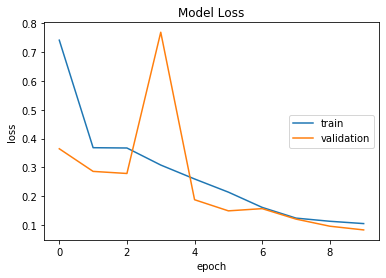

In [37]:
plt.plot(loss_values)
plt.plot(val_loss_values)
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='center right')
plt.show()

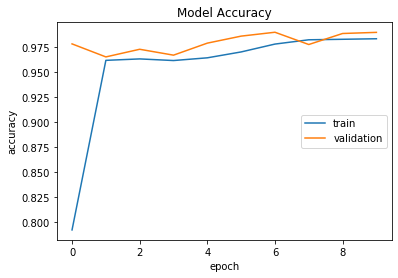

In [39]:
plt.plot(acc_values)
plt.plot(val_acc_values)
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='center right')
plt.show()

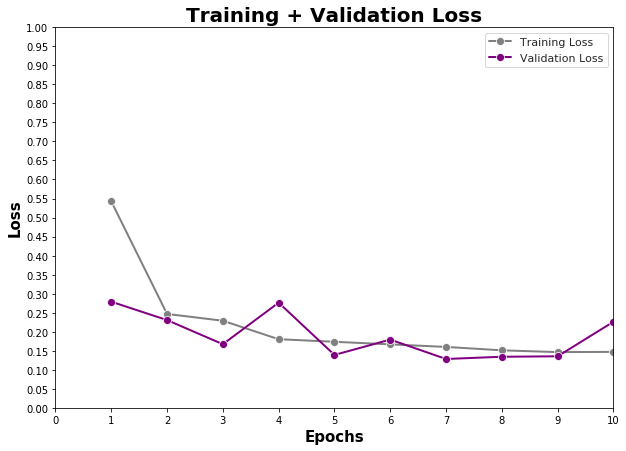

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.figure(figsize=(10, 7))
ax = plt.subplot()
sns.set(style='whitegrid', font_scale=1)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(.05))
sns.lineplot(epochs, loss_values, label='Training Loss', linewidth=2, marker='o', markersize=8, color='grey')
sns.lineplot(epochs, val_loss_values, label='Validation Loss', linewidth=2, marker='o', markersize=8, color='purple')
plt.title('Training + Validation Loss', size=20, weight='bold')
plt.xlabel('Epochs', size=15, weight='bold')
plt.ylabel('Loss', size=15, weight='bold')
plt.axis([0,11,0,1])
plt.legend()
plt.show()

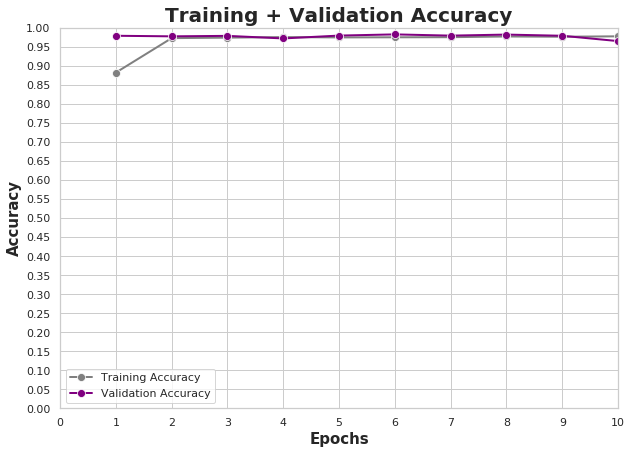

In [16]:
plt.figure(figsize=(10, 7))
ax = plt.subplot()
sns.set(style='whitegrid', font_scale=1)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(.05))
sns.lineplot(epochs, acc_values, label='Training Accuracy', linewidth=2, marker='o', markersize=8, color='grey')
sns.lineplot(epochs, val_acc_values, label='Validation Accuracy', linewidth=2, marker='o', markersize=8, color='purple')
plt.title('Training + Validation Accuracy', size=20, weight='bold')
plt.xlabel('Epochs', size=15, weight='bold')
plt.ylabel('Accuracy', size=15, weight='bold')
plt.axis([0,10,0,1])
plt.legend()
plt.show()
# plt.savefig('cnn_vanilla_tuned_accuracy.pdf')

In [57]:
hist_cnn_2a = hist2.history
loss_values = hist_cnn_2a['loss']
val_loss_values = hist_cnn_2a['val_loss']
acc_values = hist_cnn_2a['accuracy']
val_acc_values = hist_cnn_2a['val_accuracy']
epochs = range(1, len(loss_values) + 1)

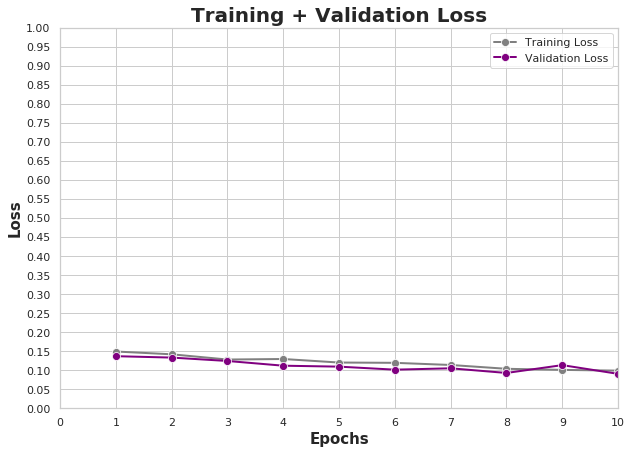

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.figure(figsize=(10, 7))
ax = plt.subplot()
sns.set(style='whitegrid', font_scale=1)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(.05))
sns.lineplot(epochs, loss_values, label='Training Loss', linewidth=2, marker='o', markersize=8, color='grey')
sns.lineplot(epochs, val_loss_values, label='Validation Loss', linewidth=2, marker='o', markersize=8, color='purple')
plt.title('Training + Validation Loss', size=20, weight='bold')
plt.xlabel('Epochs', size=15, weight='bold')
plt.ylabel('Loss', size=15, weight='bold')
plt.axis([0,10,0,1])
plt.legend()
plt.show()

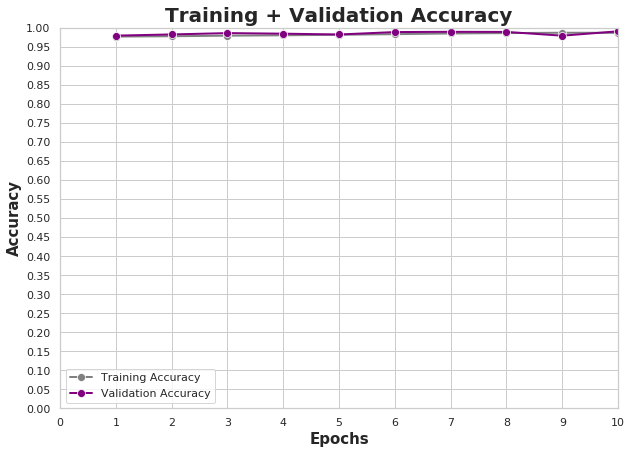

In [59]:
plt.figure(figsize=(10, 7))
ax = plt.subplot()
sns.set(style='whitegrid', font_scale=1)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(.05))
sns.lineplot(epochs, acc_values, label='Training Accuracy', linewidth=2, marker='o', markersize=8, color='grey')
sns.lineplot(epochs, val_acc_values, label='Validation Accuracy', linewidth=2, marker='o', markersize=8, color='purple')
plt.title('Training + Validation Accuracy', size=20, weight='bold')
plt.xlabel('Epochs', size=15, weight='bold')
plt.ylabel('Accuracy', size=15, weight='bold')
plt.axis([0,10,0,1])
plt.legend()
plt.show()
# plt.savefig('cnn_vanilla_tuned_accuracy.pdf')

In [ ]:
checkpoint = torch.load(dir)
model.load_state_dict(checkpoint['net'])
optimizer.load_state_dict(checkpoint['optimizer'])
start_epoch = checkpoint['epoch'] + 1

In [40]:
import os, random, shutil
def moveFile(fileDir):
        pathDir = os.listdir(fileDir)    
        filenumber=len(pathDir)
        rate=0.1   
        picknumber=int(filenumber*rate) 
        sample = random.sample(pathDir, picknumber)  
        for name in sample:
                shutil.move(fileDir+name, tarDir+name)
        return

if __name__ == '__main__':
    fileDir = "/home/wei/workspace/msda/dl/archive/augumented/0/"    #source
    tarDir = '/home/wei/workspace/msda/dl/archive/augu/0/'    #target
    moveFile(fileDir)

In [41]:
import os
path = '/home/wei/workspace/msda/dl/archive/augumented/0'      # 输入文件夹地址
files = os.listdir(path)   # 读入文件夹
num_png = len(files)
print(num_png)

81000


In [42]:
path = '/home/wei/workspace/msda/dl/archive/augu/0'      # 输入文件夹地址
files = os.listdir(path)   # 读入文件夹
num_png = len(files)
print(num_png)

19000


In [43]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
data_test = ImageDataGenerator(rescale=1/255).flow_from_directory( 
    '/home/wei/workspace/msda/dl/archive/augu',
    target_size=(128, 128),
    batch_size=10000,
    shuffle=True,
    class_mode="binary")

images_test, labels_test = next(data_test)

Using TensorFlow backend.


Found 29000 images belonging to 2 classes.


In [44]:
from keras.models import Sequential, load_model, Input, Model
from tensorflow import keras
cnn_loaded = tf.keras.models.load_model('cnn_1.h5')
cnn_loaded.evaluate(images_test, labels_test)

10000/10000 [==============================] - 17s 2ms/sample - loss: 0.1087 - accuracy: 0.9833


[0.10872062044143677, 0.9833]